In [1]:
import numpy as np
import pandas as pd
from statistics import mean , stdev , median
from random import choices
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
plt.hist(NCbirths2004.Weight, bins=30, color='blue')

plt.show()

print("Mean: ", mean(NCbirths2004.Weight))

print("Std: ", stdev(NCbirths2004.Weight))

NameError: name 'NCbirths2004' is not defined

In [39]:
def bootstrap(data, func, reps, label):
	theta_hat_stars = []
	for i in range(reps):
		resample = choices(data, k=len(data))
		theta_hat_star = func(resample)
		theta_hat_stars.append(theta_hat_star)
	return pd.DataFrame(theta_hat_stars, columns=[label])

In [40]:
NCbirths2004bootstrap = bootstrap(NCbirths2004.Weight, mean, 10000, 'Weight')


In [42]:
type(NCbirths2004bootstrap)


pandas.core.frame.DataFrame

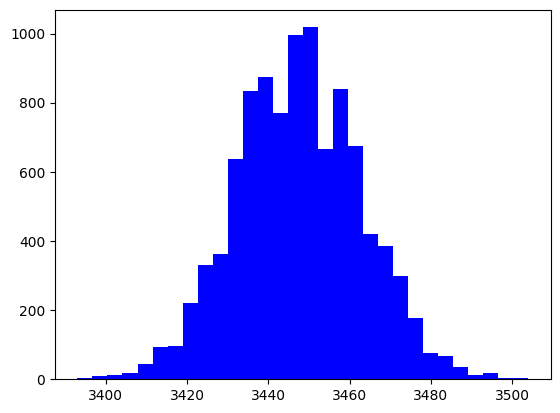

Mean:  3447.4672
Std:  15.386994512250013


In [43]:
plt.hist(NCbirths2004bootstrap.Weight, bins=30, color='blue')

plt.show()

print("Mean: ", mean(NCbirths2004bootstrap.Weight))

print("Std: ", stdev(NCbirths2004bootstrap.Weight))

In [44]:
print(len(NCbirths2004))

print(len(NCbirths2004bootstrap))

1009
10000


In [112]:
mu = 162
sigma = 6.89
size = 100



print(data)

[167.04683832 165.58440142 164.48947812 164.00686546 168.48547209
 160.40338688 164.02228852 160.31277365 164.82241179 164.88496019
 165.52306768 160.813906   159.40151945 160.20649741 160.2453303
 157.44320851 159.89439791 160.85179909 159.52752164 160.19141904
 160.70373994 160.9095276  168.41439638 164.35155585 156.62036181
 160.24805616 161.00724485 164.28748068 162.06043677 158.25786169
 162.51916427 160.17362237 160.46814888 163.95754387 161.82402536
 155.02303404 162.65366365 161.55060782 161.97847783 160.86520565
 157.67746064 159.73591136 165.72973419 163.72808464 160.13714286
 159.86981212 160.4838253  164.18465426 161.44331572 162.93593606
 160.82336034 161.88425737 159.88868548 161.07203911 156.48650822
 162.87469253 160.05780271 163.56536235 162.52503172 162.17547939
 165.87270071 162.28542112 161.09858249 162.01863647 160.08892734
 162.55313948 163.555918   164.05870641 161.71076304 159.58472156
 157.30658386 160.44828388 160.43083746 161.38434425 159.97178878
 160.681129

In [113]:
plt.hist(data.Height, bins=30, color='blue')

plt.show()

print("Mean: ", mean(data.Height))

print("Std: ", stdev(data.Height))

AttributeError: 'numpy.ndarray' object has no attribute 'Height'

In [116]:
mu = 162
var = 6.89
sigma = np.sqrt(var)
n = 1000

varavg = var / n

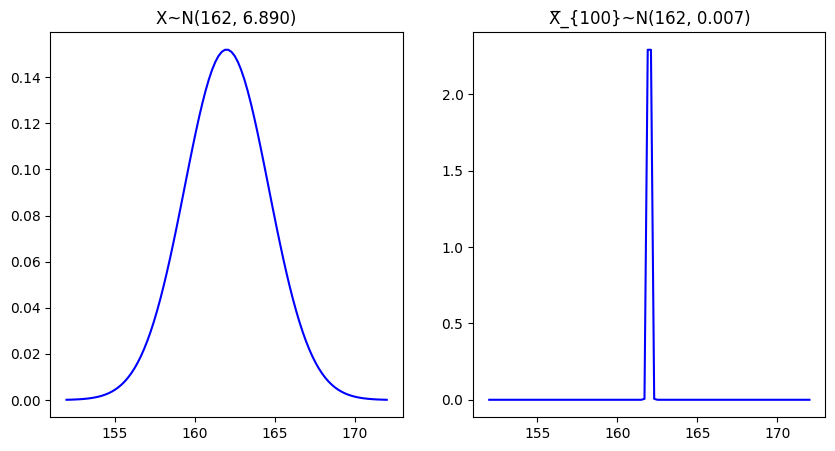

In [121]:
# Create a range
x = np.linspace(152, 172, 100)

# Create the normal distribution for the range
y = norm.pdf(x, mu, np.sqrt(var))
yavg = norm.pdf(x, mu, np.sqrt(varavg))

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the normal distribution on the left subplot
axs[0].plot(x, y, 'b')

axs[1].plot(x, yavg, 'b')

# Plot the histogram on the right subplot
# axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

# Set titles
axs[0].set_title('X~N(%s, %1.3f)' % (mu, var))
axs[1].set_title('X̅_{%i}~N(%s, %1.3f)' % (size, mu, varavg))



plt.show()

In [122]:

myheights = pd.DataFrame(np.random.normal(mu, sigma, 1000), columns=['Height'])

myheights_bootstrap= bootstrap(myheights.Height, mean, n, 'Height')

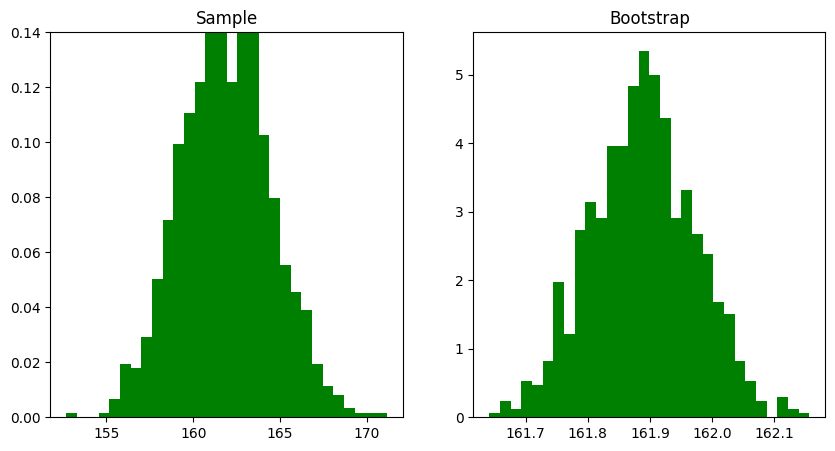

In [123]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the left subplot
axs[0].hist(myheights, bins=30, density = True, color='g')

# Plot the second histogram on the right subplot
axs[1].hist(myheights_bootstrap, density = True, bins=30, color='g')

axs[0].set_ylim(0, .14)

# Set titles
axs[0].set_title('Sample')
axs[1].set_title('Bootstrap')

plt.show()